# Fundamentals of Unsupervised Machine Learning

## Intro

<br /><br />

### Motivation

So far we have studied algorithms that work with labeled/annotated data and we divided those algorithms in two classes: Regression algorithms - data label is continuous variable; Classification algorithms - data label is discrete/categorical variable. The part of Machine Learning that deals with these kind of algorithms requiring labeled data points is called <b>Supervised Machine Learning</b>.

However, there are bunch of cases where data labels are not available! Moreover, most of the data in real world doesn't come with labels! Our goal is to still extract some insights out of these datasets without hiring people to do manual annotation which might be expensive or sometimes impossible. The part of machine learning dealing with unlabeled data is called <b>Unsupervised Machine Learning</b>.

Many people believe that unsupervised learning is the key to the general Artificial Intelligence as human babes do most of the learning without explicit supervision.

The goal of today's class is to introduce to some of the most popular unsupervised learning algorithms and go through some use-cases where these algorithms are applicable.


### Learning Objectives

At the end of this class, listeners will be able to:

<ul>
    <li>Understand conceptual differences between Supervised and Unsupervised machine learning.</li>
    <li>Get familiar with several essential unsupervised learning algorithms.</li>
    <li>Get intuition about when these algorithms shall be used.</li>
</ul>

### Reading Material

<ul>
    <li>K-Means algorithm: https://youtu.be/J0A_tkIgutw?list=PLnZuxOufsXnvftwTB1HL6mel1V32w0ThI <b>(mandatory)</b></li> 
    <li>Gaussian Mixture Models: https://youtu.be/I9dfOMAhsug?list=PLnZuxOufsXnvftwTB1HL6mel1V32w0ThI <b>(mandatory)</b></li>
    <li>EM algorithm for Gaussian Mixture Models: https://youtu.be/lMShR1vjbUo?list=PLnZuxOufsXnvftwTB1HL6mel1V32w0ThI</li>
    <li>DBSCAN algorithm: https://en.wikipedia.org/wiki/DBSCAN</li>
    <li>AMLD 2020 workshop material on unsupervised fraud detection: https://github.com/amld/workshop-unsupervised-fraud</li>
</ul>


<br /><br /><br /><br />

## Clustering

Clustering is one of the important sub-topics of unsupervised machine learning that deals with algorithms that separate/cluster data into logical groups.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA

%matplotlib inline

In [66]:
df = pd.read_csv('data/workshop_1/framingham.csv')

df.shape

(4240, 16)

In [61]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Removing Missing Data

There are bunch of ways to handle missing data, but here we just drop entire row if at least one of its entries is missing (number of such rows are relatively small).

In [62]:
# we check and see that missing data is present in the dataset

df.isna().any().any()

True

In [63]:
# counting the percentage of rows we need to drop.

df.isna().any(axis=1).sum() / len(df)

0.13726415094339622

In [72]:
# dropping rows

df.drop(df[df.isna().any(axis=1)].index, inplace=True)

In [73]:
df.shape

(3658, 16)

In [74]:
Y = df.pop('TenYearCHD')

Positive class (anomaly) is approximately 15%.

In [77]:
Y.value_counts() / len(df)

0    0.847731
1    0.152269
Name: TenYearCHD, dtype: float64

In [114]:
pca = PCA(n_components=2)

In [115]:
X = pca.fit_transform(df)

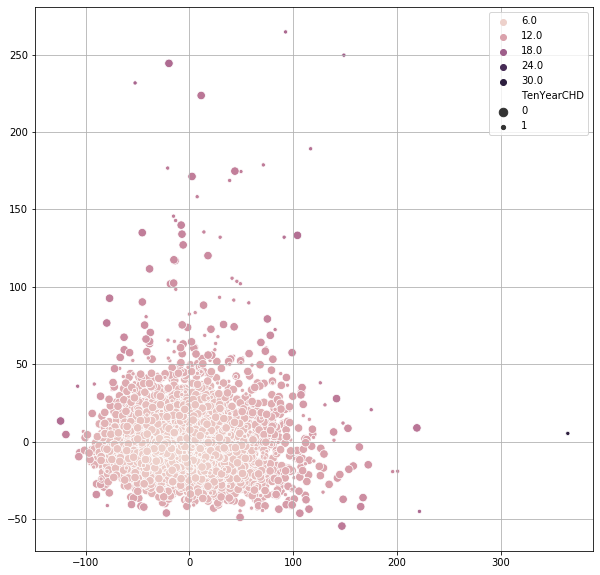

In [121]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=scores, size=Y, data=df)
plt.grid()

In [98]:
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

In [113]:
gmm = GaussianMixture(n_components=50)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=50, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [111]:
scores = -gmm.score_samples(X)

In [97]:
gmm.predict_proba(X)

array([[0.98844104, 0.01155896],
       [0.97700667, 0.02299333],
       [0.97868319, 0.02131681],
       ...,
       [0.89761256, 0.10238744],
       [0.98107349, 0.01892651],
       [0.98411226, 0.01588774]])